# Artificial Neural Network (ANN)

# 1. Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_data= pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head(5)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


We'll use the data to train a model to predict how we will do on our next test.

This is a **supervised regression** problem.

It's **supervised** because our examples have outputs(y).

It's a **regression** because we're predicting the test score, which is a continuous output.

If we we're predicting the grade (A,B, etc.), however, this is going to be a **classification** problem but not a regression problem.

In [3]:
train_data.shape

(700, 2)

In [4]:
train_data.dropna().shape

(699, 2)

In [5]:
# it means we have 1 null value in any feature lets drop them
train_data = train_data.dropna()
train_data.shape

(699, 2)

In [6]:
y = np.array(train_data['y']).reshape(train_data.shape[0],1)
X = np.append(np.ones([train_data.shape[0],1]) , np.array(train_data['x']).reshape(train_data.shape[0],1)  , axis=1 )

X_test_data = np.append(np.ones([test_data.shape[0] , 1 ] , dtype=int) , np.array(test_data['x']).reshape(test_data.shape[0] ,1) , axis=1)
y_test = np.array(test_data['y']).reshape(test_data.shape[0] , 1)

X  # A0 A1

array([[ 1., 24.],
       [ 1., 50.],
       [ 1., 15.],
       ...,
       [ 1., 82.],
       [ 1., 66.],
       [ 1., 97.]])

In [7]:
# normalizing the data to zero mean
X[:,1] = (X[:,1] / np.mean(X[:,1]))
y = (y / np.mean(y))

X_test_data[:,1] = (X_test_data[:,1] / np.mean(X_test_data[:,1]))
y_test = (y_test / np.mean(y_test))


## Now we can start building our neural network

## we have two neuron in input layer {X = A0 , A1}

## one neuron in output layer {y = A2}

## any layer between input and output layer is called HIDDEN LAYER. We use here only 1 hidden layer and 2 neurons

**Synapses** have a really simple job.  {It is nothing but a parameter or we can say that **SLOPE** }

They take a value from their input, multiply it by a specific **weight**, and output the result. In other words, the synapses store parameters called **"weights"** which are used to manipulate the data.

**Neurons** are a little more complicated.

Neurons' job is to add together the outputs of all their synapses, and then apply an **activation function.**

### Ok, Now what is Activation Function Here???!!
$$
h_{\theta}(x)=\theta_{0}+\theta_{1} x_{1}
$$

$$
h(x)=\sum_{i=0}^{n} \theta_{i} x_{i}=\theta^{T} x
$$

$h(x)$ is a **Activation function** and its value is called **Activation**

### Fine! Now what we have to do with this activation function??

#### this function give us expected output value. After getting the values we compare them with original output value
#### by using 

$$
J(a, b)=\frac{1}{n} \sum_{i=1}^{n}\left(y_{i, a c t u a l}-y_{i, p r e d i c t e d}\right)^{2}
$$

$$
J(a, b)=\frac{1}{n} \sum_{i=1}^{n}\left(y_{i}-\left(a x_{i}+b\right)\right)^{2}
$$

This is also called as **Cost Function** or **Least Square Error** or **Loss Function** blaa blaa blaa!!

We have to find that theta's values by which we getting this cost function value **minimum**

#### How??

by using **Gradient Decent**

When we updating theta values it means our model is learning after getting best theta value our model is trained


## This least square or cost function tell us that how costly our model is

## Now we have to minimize this least square by using gradient decent 

## we have 6 unknown weights or theta i.e theta1 = [2 x 2] theta2 = [2 x 1]
## we have to find their optimum values 
## and we're going to make our L( theta )[cost function] as small as possible with a optimal combination of the weights.

# Back Propagation of error

Backpropagation (Backward propagation of errors) algorithm is used to train artificial neural networks, it can update the weights very efficiently.
Usually, it is used in conjunction with an gradient descent optimization method.

Basically, backpropagation is just a very computationally efficient approach to compute the derivatives of a complex cost function and our goal is to use those derivatives to learn the weight coefficients for parameterizing a multi-layer artificial neural network. The parameterization of neural networks is challenging because we are typically dealing with a very large number of weight coefficients in a high-dimensional feature space.

In other words, the method calculates the gradient (∂J∂W) of a cost (loss or objective) function with respect to all the weights in the network, so that the gradient is fed to the gradient descent method which in turn uses it to update the weights in order to minimize the cost function.

Since backpropagation requires a known, target data for each input value in order to calculate the cost function gradient, it is usually used in a supervised networks.

## Actually, training a network means minimizing a cost function.

$$
J=\frac{1}{2} \sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right)^{2}
$$

this function sometimes overshoot the gradient. Instead of this we can divide this function with size of data i.e N not by 2

In [8]:
class NeuralNetwork():
    
    def __init__(self , lmda = 0 ):
        # define hyperparameter
        self.input_layer_n = 2
        self.hidden_layer_n = 2
        self.output_layer_n = 1
        np.random.seed(9)
        # weight parameter
        self.theta1 = np.random.randn(self.input_layer_n,self.hidden_layer_n) # dim = neuron in previous * neuron in current first layer theta
        self.theta2 = np.random.randn(self.hidden_layer_n,self.output_layer_n) 
    
        self.lmda = lmda
    def forwardPropagation(self, X):
        self.a1 = np.dot(X , self.theta1)  # activation of first layer or hidden layer
        self.a2 = np.dot(self.a1 , self.theta2) # activation of second layer or output layer
        return self.a2
    
    def cost_function(self,X,y):
        self.y_cap = self.forwardPropagation(X)
        L = (1/X.shape[0]) * np.sum( (y - self.y_cap)**2 )
        return L
    
    def cost_function_derivative(self , X , y):
        # compute the derivative of cost function w.r.t theta1 and theta2
        self.y_cap = self.forwardPropagation(X)
        
        dL_dA2 = ((self.y_cap - y) * (2/X.shape[0])) 
        dA_dtheta2 = self.a1
        dL_dtheta2 = np.dot(dA_dtheta2.T , dL_dA2) # new theta's of 2nd layer
        
        dL_dA1 = np.matmul( ((self.y_cap - y) * (2/X.shape[0])) , self.theta2.T ) 
        dA_dtheta1 = X
        dL_dtheta1 = np.dot(dA_dtheta1.T , dL_dA1) # new theta's of 1st layer
    
        return dL_dtheta1 , dL_dtheta2
    
    
    
    # dont use this function for intial trail. first read out whole notebook then write this function
    # you will came to know after reading whole notebook why I use this function 
    def cost_function_regularize(self , X , y):
        self.y_cap = self.forwardPropagation(X)
        L = (1/X.shape[0]) * np.sum( (y - self.y_cap)**2) + (self.lmda*((np.sum(self.theta1)**2) + (np.sum(self.theta1)**2)))
        return L
    
    # dont use this function for intial trail. first read out whole notebook then write this function
    # you will came to know after reading whole notebook why I use this function
    def cost_function_derivative_regularize(self , X , y):
        # compute the derivative of cost function w.r.t theta1 and theta2
        self.y_cap = self.forwardPropagation(X)
        
        dL_dA2 = ((self.y_cap - y) * (2/X.shape[0])) 
        dA_dtheta2 = self.a1
        dL_dtheta2 = np.dot(dA_dtheta2.T , dL_dA2) +  (self.lmda * self.theta2) # new theta's of 2nd layer
        
        dL_dA1 = np.matmul( ((self.y_cap - y) * (2/X.shape[0])) , self.theta2.T ) 
        dA_dtheta1 = X
        dL_dtheta1 = np.dot(dA_dtheta1.T , dL_dA1) + (self.lmda * self.theta1)# new theta's of 1st layer
        
        return dL_dtheta1 , dL_dtheta2

In [9]:
def gradientDecent(NN , X , y):
    alpha = 0.001
    epsilon = 0.00001
    i = 1
    itera = []
    csfun = []
    while True:
        
        #initial_cost = NN.cost_function(X , y )
        initial_cost = NN.cost_function_regularize(X , y )
        
        
        #theta1 , theta2 = NN.cost_function_derivative(X, y )
        theta1 , theta2 = NN.cost_function_derivative_regularize(X, y )
        
        NN.theta1 = NN.theta1 - alpha * theta1
        NN.theta2 = NN.theta2 - alpha * theta2
        
        #final_cost = NN.cost_function(X , y)
        final_cost = NN.cost_function_regularize(X , y)
        
        if abs(final_cost - initial_cost) < epsilon:
            break
        print('Iteration {} Initial cost {} final cost {}'.format(i , initial_cost , final_cost))    
        
        itera.append(i)
        csfun.append(final_cost)
        i+=1
    return itera , csfun

In [29]:
NN = NeuralNetwork()
itera , csfun = gradientDecent(NN , X , y)

Iteration 1 Initial cost 0.30046939108915716 final cost 0.2975975945497306
Iteration 2 Initial cost 0.2975975945497306 final cost 0.29474876095155855
Iteration 3 Initial cost 0.29474876095155855 final cost 0.2919227875243885
Iteration 4 Initial cost 0.2919227875243885 final cost 0.2891195711268113
Iteration 5 Initial cost 0.2891195711268113 final cost 0.2863390082487806
Iteration 6 Initial cost 0.2863390082487806 final cost 0.2835809950144608
Iteration 7 Initial cost 0.2835809950144608 final cost 0.28084542718539607
Iteration 8 Initial cost 0.28084542718539607 final cost 0.2781322001639895
Iteration 9 Initial cost 0.2781322001639895 final cost 0.2754412089972894
Iteration 10 Initial cost 0.2754412089972894 final cost 0.272772348381068
Iteration 11 Initial cost 0.272772348381068 final cost 0.27012551266418877
Iteration 12 Initial cost 0.27012551266418877 final cost 0.2675005958532532
Iteration 13 Initial cost 0.2675005958532532 final cost 0.2648974916175177
Iteration 14 Initial cost 0.2

Iteration 247 Initial cost 0.03013177780000846 final cost 0.02994033500675928
Iteration 248 Initial cost 0.02994033500675928 final cost 0.029751354020519687
Iteration 249 Initial cost 0.029751354020519687 final cost 0.02956480394403692
Iteration 250 Initial cost 0.02956480394403692 final cost 0.02938065422546501
Iteration 251 Initial cost 0.02938065422546501 final cost 0.02919887465537938
Iteration 252 Initial cost 0.02919887465537938 final cost 0.029019435363798772
Iteration 253 Initial cost 0.029019435363798772 final cost 0.028842306817215564
Iteration 254 Initial cost 0.028842306817215564 final cost 0.028667459815634563
Iteration 255 Initial cost 0.028667459815634563 final cost 0.028494865489620533
Iteration 256 Initial cost 0.028494865489620533 final cost 0.02832449529735522
Iteration 257 Initial cost 0.02832449529735522 final cost 0.028156321021703932
Iteration 258 Initial cost 0.028156321021703932 final cost 0.02799031476729214
Iteration 259 Initial cost 0.02799031476729214 final

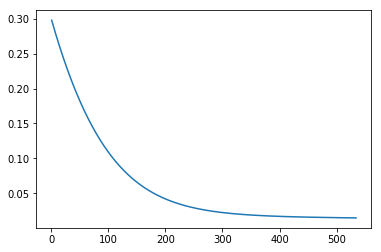

In [30]:
plt.plot(itera , csfun)    

In [31]:
y_cap = (NN.forwardPropagation(X)[:,0])
a = pd.DataFrame([ y_cap ,  y[:,0]]).T
a.columns = ['predicted_values' , 'actual_values']
a.head(5)

,predicted_values,actual_values
0,0.603067,0.431508
1,1.030273,0.950432
2,0.455188,0.344788
3,0.833101,0.732609
4,1.638220,1.747882


$$
\overline{y}=\frac{1}{n} \sum_{i=1}^{n} y_{i}
$$
The total sum of squares (proportional to the variance of the data):
$$
S S_{\mathrm{tot}}=\sum_{i}\left(y_{i}-\overline{y}\right)^{2}
$$
The regression sum of squares, also called the explained sum of squares:
$$
S S_{\mathrm{reg}}=\sum_{i}\left(f_{i}-\overline{y}\right)^{2}
$$
The sum of squares of residuals, also called the residual sum of squares
$$
S S_{\mathrm{res}}=\sum_{i}\left(y_{i}-f_{i}\right)^{2}=\sum_{i} e_{i}^{2}
$$
The most general definition of the coefficient of determination is
$$
R^{2} \equiv 1-\frac{S S_{\mathrm{res}}}{S S_{\mathrm{tot}}}
$$

In [32]:
def r_square( y_cap  , y ):
    
    rss = np.sum(( y - y_cap) ** 2)
    tss = np.sum(( y - np.mean(y) )** 2)
    r2 =  1 -  (rss/tss)
    
    return r2

def rs_error(y_cap , y):
    rss = np.sqrt(np.sum( ( y  - y_cap )** 2) / (len(y) - 2) )  
    return rss

def mse(y_cap , y):
    return  (np.sum(( y  - y_cap ) ** 2) / len(y))
    
print("R2 : ",r_square(y_cap , y[:,0]))
print('Residual Sum of Square Error : ',rs_error(y_cap , y[:,0]))
print("Mean square error :", mse(y_cap , y[:,0]))


R2 :  0.9558680076146762
Residual Sum of Square Error :  0.12253812038922965
Mean square error : 0.01497262788429494


# R2 shows that how much our predicted value define our original value here it give 96%. BOOM!!!
# I think it is the case of OVERFITTING bcz we have only 1 variable and we are dealing with 6 parameters

# Lets try to overcome the fitting i.e we are add some amount of bias

# this technique of adding bias is called as Regularization 

# since we have 2 type of regularization till I study may be there are more

1. lasso Regularization
formula : lambda * [sum of parameters except intercept]
2. Ridge Regularization
formula : lambda * [sum of square of parameters except intercept]
why we dont take intercept?
because all other parameters are scaled by measurements
here, lambda is hyperparameter its value should be assumed 

Here we use Ridge Regression. Why??
Because..
1. when the sample sizes are relatively small, then ridge regression can improve prediction made from new data by making prediction less sensitive to the training data
2. Ridge regression helps reduce variance by shrinking parameter approx to zero while lasso regression reduce variance by shrinking parameter almost to zero means lasso regression remove the useless variables by making its parameter almost to zero here we have only 1 variable which is 'X'   


# Testing with test data


In [33]:
itera , csfun = gradientDecent(NN , X_test_data , y_test)
y_cap_test = (NN.forwardPropagation(X_test_data)[:,0])
print("R2 : ",r_square(y_cap_test , y_test[:,0]))
print('Residual Sum of Square Error : ',rs_error(y_cap_test , y_test[:,0]))
print("Mean square error :", mse(y_cap_test , y_test[:,0]))

Iteration 1 Initial cost 0.2276504049762133 final cost 0.22673695604810784
Iteration 2 Initial cost 0.22673695604810784 final cost 0.22582841745665114
Iteration 3 Initial cost 0.22582841745665114 final cost 0.2249247774235345
Iteration 4 Initial cost 0.2249247774235345 final cost 0.22402602404862498
Iteration 5 Initial cost 0.22402602404862498 final cost 0.22313214531147282
Iteration 6 Initial cost 0.22313214531147282 final cost 0.22224312907282345
Iteration 7 Initial cost 0.22224312907282345 final cost 0.2213589630761298
Iteration 8 Initial cost 0.2213589630761298 final cost 0.2204796349490669
Iteration 9 Initial cost 0.2204796349490669 final cost 0.21960513220504885
Iteration 10 Initial cost 0.21960513220504885 final cost 0.21873544224474673
Iteration 11 Initial cost 0.21873544224474673 final cost 0.21787055235760638
Iteration 12 Initial cost 0.21787055235760638 final cost 0.2170104497233695
Iteration 13 Initial cost 0.2170104497233695 final cost 0.21615512141359408
Iteration 14 Init

Iteration 238 Initial cost 0.1153133256228055 final cost 0.11513722650457492
Iteration 239 Initial cost 0.11513722650457492 final cost 0.11496254876048687
Iteration 240 Initial cost 0.11496254876048687 final cost 0.11478928194440645
Iteration 241 Initial cost 0.11478928194440645 final cost 0.11461741566903523
Iteration 242 Initial cost 0.11461741566903523 final cost 0.11444693960582189
Iteration 243 Initial cost 0.11444693960582189 final cost 0.11427784348486848
Iteration 244 Initial cost 0.11427784348486848 final cost 0.11411011709483404
Iteration 245 Initial cost 0.11411011709483404 final cost 0.11394375028283404
Iteration 246 Initial cost 0.11394375028283404 final cost 0.11377873295433721
Iteration 247 Initial cost 0.11377873295433721 final cost 0.11361505507305844
Iteration 248 Initial cost 0.11361505507305844 final cost 0.11345270666084896
Iteration 249 Initial cost 0.11345270666084896 final cost 0.1132916777975829
Iteration 250 Initial cost 0.1132916777975829 final cost 0.1131319

Iteration 522 Initial cost 0.09599591998429537 final cost 0.09597845186972034
Iteration 523 Initial cost 0.09597845186972034 final cost 0.09596110927581694
Iteration 524 Initial cost 0.09596110927581694 final cost 0.09594389106079981
Iteration 525 Initial cost 0.09594389106079981 final cost 0.0959267960932539
Iteration 526 Initial cost 0.0959267960932539 final cost 0.09590982325204607
Iteration 527 Initial cost 0.09590982325204607 final cost 0.09589297142623739
Iteration 528 Initial cost 0.09589297142623739 final cost 0.09587623951499591
Iteration 529 Initial cost 0.09587623951499591 final cost 0.0958596264275104
Iteration 530 Initial cost 0.0958596264275104 final cost 0.0958431310829044
Iteration 531 Initial cost 0.0958431310829044 final cost 0.09582675241015116
Iteration 532 Initial cost 0.09582675241015116 final cost 0.09581048934798915
Iteration 533 Initial cost 0.09581048934798915 final cost 0.09579434084483818
Iteration 534 Initial cost 0.09579434084483818 final cost 0.0957783058

# accuracy is not good it is just 70% because our model overfit the data
# we have to overcome that

# Applying Regularization

In [34]:
NN = NeuralNetwork(lmda=0.03)
itera , csfun = gradientDecent(NN , X , y)

Iteration 1 Initial cost 0.4210081329851702 final cost 0.41847762643391595
Iteration 2 Initial cost 0.41847762643391595 final cost 0.4159691808034024
Iteration 3 Initial cost 0.4159691808034024 final cost 0.4134826821290135
Iteration 4 Initial cost 0.4134826821290135 final cost 0.4110180162454114
Iteration 5 Initial cost 0.4110180162454114 final cost 0.40857506878914834
Iteration 6 Initial cost 0.40857506878914834 final cost 0.406153725201573
Iteration 7 Initial cost 0.406153725201573 final cost 0.4037538707320246
Iteration 8 Initial cost 0.4037538707320246 final cost 0.4013753904413069
Iteration 9 Initial cost 0.4013753904413069 final cost 0.3990181692054321
Iteration 10 Initial cost 0.3990181692054321 final cost 0.39668209171962854
Iteration 11 Initial cost 0.39668209171962854 final cost 0.3943670425026038
Iteration 12 Initial cost 0.3943670425026038 final cost 0.3920729059010539
Iteration 13 Initial cost 0.3920729059010539 final cost 0.38979956609441146
Iteration 14 Initial cost 0.3

Iteration 212 Initial cost 0.2053096270062529 final cost 0.20511368300372032
Iteration 213 Initial cost 0.20511368300372032 final cost 0.20492072099947597
Iteration 214 Initial cost 0.20492072099947597 final cost 0.20473070069530988
Iteration 215 Initial cost 0.20473070069530988 final cost 0.20454358223185484
Iteration 216 Initial cost 0.20454358223185484 final cost 0.2043593261854277
Iteration 217 Initial cost 0.2043593261854277 final cost 0.20417789356486293
Iteration 218 Initial cost 0.20417789356486293 final cost 0.20399924580833914
Iteration 219 Initial cost 0.20399924580833914 final cost 0.20382334478019903
Iteration 220 Initial cost 0.20382334478019903 final cost 0.20365015276776435
Iteration 221 Initial cost 0.20365015276776435 final cost 0.2034796324781457
Iteration 222 Initial cost 0.2034796324781457 final cost 0.20331174703504779
Iteration 223 Initial cost 0.20331174703504779 final cost 0.20314645997557232
Iteration 224 Initial cost 0.20314645997557232 final cost 0.202983735

Iteration 391 Initial cost 0.1936449373158153 final cost 0.19363152258798894
Iteration 392 Initial cost 0.19363152258798894 final cost 0.19361821616442557
Iteration 393 Initial cost 0.19361821616442557 final cost 0.19360501487613313
Iteration 394 Initial cost 0.19360501487613313 final cost 0.19359191561003627
Iteration 395 Initial cost 0.19359191561003627 final cost 0.19357891530816218
Iteration 396 Initial cost 0.19357891530816218 final cost 0.19356601096683548
Iteration 397 Initial cost 0.19356601096683548 final cost 0.19355319963588496
Iteration 398 Initial cost 0.19355319963588496 final cost 0.19354047841785865
Iteration 399 Initial cost 0.19354047841785865 final cost 0.19352784446724977
Iteration 400 Initial cost 0.19352784446724977 final cost 0.19351529498973233
Iteration 401 Initial cost 0.19351529498973233 final cost 0.19350282724140658
Iteration 402 Initial cost 0.19350282724140658 final cost 0.19349043852805384
Iteration 403 Initial cost 0.19349043852805384 final cost 0.19347

Iteration 706 Initial cost 0.1892396412284008 final cost 0.18922195114535567
Iteration 707 Initial cost 0.18922195114535567 final cost 0.18920424795912316
Iteration 708 Initial cost 0.18920424795912316 final cost 0.1891865317993567
Iteration 709 Initial cost 0.1891865317993567 final cost 0.18916880279509113
Iteration 710 Initial cost 0.18916880279509113 final cost 0.18915106107474222
Iteration 711 Initial cost 0.18915106107474222 final cost 0.1891333067661056
Iteration 712 Initial cost 0.1891333067661056 final cost 0.18911553999635636
Iteration 713 Initial cost 0.18911553999635636 final cost 0.18909776089204788
Iteration 714 Initial cost 0.18909776089204788 final cost 0.18907996957911175
Iteration 715 Initial cost 0.18907996957911175 final cost 0.18906216618285698
Iteration 716 Initial cost 0.18906216618285698 final cost 0.18904435082796966
Iteration 717 Initial cost 0.18904435082796966 final cost 0.18902652363851258
Iteration 718 Initial cost 0.18902652363851258 final cost 0.189008684

Iteration 992 Initial cost 0.1839947667405171 final cost 0.18397657393607128
Iteration 993 Initial cost 0.18397657393607128 final cost 0.18395838546028348
Iteration 994 Initial cost 0.18395838546028348 final cost 0.18394020133095637
Iteration 995 Initial cost 0.18394020133095637 final cost 0.18392202156574397
Iteration 996 Initial cost 0.18392202156574397 final cost 0.18390384618215225
Iteration 997 Initial cost 0.18390384618215225 final cost 0.18388567519754043
Iteration 998 Initial cost 0.18388567519754043 final cost 0.18386750862912196
Iteration 999 Initial cost 0.18386750862912196 final cost 0.18384934649396548
Iteration 1000 Initial cost 0.18384934649396548 final cost 0.18383118880899596
Iteration 1001 Initial cost 0.18383118880899596 final cost 0.18381303559099543
Iteration 1002 Initial cost 0.18381303559099543 final cost 0.18379488685660453
Iteration 1003 Initial cost 0.18379488685660453 final cost 0.18377674262232288
Iteration 1004 Initial cost 0.18377674262232288 final cost 0.

Iteration 1188 Initial cost 0.18052678918828963 final cost 0.1805096503368885
Iteration 1189 Initial cost 0.1805096503368885 final cost 0.18049251742274297
Iteration 1190 Initial cost 0.18049251742274297 final cost 0.18047539044801067
Iteration 1191 Initial cost 0.18047539044801067 final cost 0.1804582694148142
Iteration 1192 Initial cost 0.1804582694148142 final cost 0.18044115432524108
Iteration 1193 Initial cost 0.18044115432524108 final cost 0.18042404518134414
Iteration 1194 Initial cost 0.18042404518134414 final cost 0.18040694198514187
Iteration 1195 Initial cost 0.18040694198514187 final cost 0.1803898447386186
Iteration 1196 Initial cost 0.1803898447386186 final cost 0.1803727534437247
Iteration 1197 Initial cost 0.1803727534437247 final cost 0.18035566810237696
Iteration 1198 Initial cost 0.18035566810237696 final cost 0.18033858871645886
Iteration 1199 Initial cost 0.18033858871645886 final cost 0.18032151528782062
Iteration 1200 Initial cost 0.18032151528782062 final cost 0

Iteration 1470 Initial cost 0.1759306032316861 final cost 0.17591514211624662
Iteration 1471 Initial cost 0.17591514211624662 final cost 0.17589968678634504
Iteration 1472 Initial cost 0.17589968678634504 final cost 0.17588423724013524
Iteration 1473 Initial cost 0.17588423724013524 final cost 0.1758687934757676
Iteration 1474 Initial cost 0.1758687934757676 final cost 0.17585335549138922
Iteration 1475 Initial cost 0.17585335549138922 final cost 0.17583792328514364
Iteration 1476 Initial cost 0.17583792328514364 final cost 0.17582249685517132
Iteration 1477 Initial cost 0.17582249685517132 final cost 0.17580707619960928
Iteration 1478 Initial cost 0.17580707619960928 final cost 0.17579166131659138
Iteration 1479 Initial cost 0.17579166131659138 final cost 0.1757762522042481
Iteration 1480 Initial cost 0.1757762522042481 final cost 0.1757608488607068
Iteration 1481 Initial cost 0.1757608488607068 final cost 0.17574545128409183
Iteration 1482 Initial cost 0.17574545128409183 final cost 

Iteration 1759 Initial cost 0.17169517552620636 final cost 0.17168130239110568
Iteration 1760 Initial cost 0.17168130239110568 final cost 0.17166743444778368
Iteration 1761 Initial cost 0.17166743444778368 final cost 0.17165357169414874
Iteration 1762 Initial cost 0.17165357169414874 final cost 0.17163971412810994
Iteration 1763 Initial cost 0.17163971412810994 final cost 0.17162586174757669
Iteration 1764 Initial cost 0.17162586174757669 final cost 0.1716120145504586
Iteration 1765 Initial cost 0.1716120145504586 final cost 0.171598172534666
Iteration 1766 Initial cost 0.171598172534666 final cost 0.1715843356981095
Iteration 1767 Initial cost 0.1715843356981095 final cost 0.17157050403870022
Iteration 1768 Initial cost 0.17157050403870022 final cost 0.17155667755434967
Iteration 1769 Initial cost 0.17155667755434967 final cost 0.17154285624296972
Iteration 1770 Initial cost 0.17154285624296972 final cost 0.17152904010247286
Iteration 1771 Initial cost 0.17152904010247286 final cost 0

Iteration 2109 Initial cost 0.1671422000710767 final cost 0.1671300205461152
Iteration 2110 Initial cost 0.1671300205461152 final cost 0.16711784551939238
Iteration 2111 Initial cost 0.16711784551939238 final cost 0.16710567498905463
Iteration 2112 Initial cost 0.16710567498905463 final cost 0.16709350895324887
Iteration 2113 Initial cost 0.16709350895324887 final cost 0.1670813474101231
Iteration 2114 Initial cost 0.1670813474101231 final cost 0.16706919035782586
Iteration 2115 Initial cost 0.16706919035782586 final cost 0.1670570377945065
Iteration 2116 Initial cost 0.1670570377945065 final cost 0.1670448897183151
Iteration 2117 Initial cost 0.1670448897183151 final cost 0.1670327461274026
Iteration 2118 Initial cost 0.1670327461274026 final cost 0.16702060701992066
Iteration 2119 Initial cost 0.16702060701992066 final cost 0.16700847239402153
Iteration 2120 Initial cost 0.16700847239402153 final cost 0.16699634224785848
Iteration 2121 Initial cost 0.16699634224785848 final cost 0.16

Iteration 2412 Initial cost 0.16364936017104914 final cost 0.16363846222188053
Iteration 2413 Initial cost 0.16363846222188053 final cost 0.16362756824312313
Iteration 2414 Initial cost 0.16362756824312313 final cost 0.16361667823314358
Iteration 2415 Initial cost 0.16361667823314358 final cost 0.16360579219030935
Iteration 2416 Initial cost 0.16360579219030935 final cost 0.16359491011298855
Iteration 2417 Initial cost 0.16359491011298855 final cost 0.16358403199954996
Iteration 2418 Initial cost 0.16358403199954996 final cost 0.16357315784836315
Iteration 2419 Initial cost 0.16357315784836315 final cost 0.16356228765779818
Iteration 2420 Initial cost 0.16356228765779818 final cost 0.16355142142622595
Iteration 2421 Initial cost 0.16355142142622595 final cost 0.16354055915201812
Iteration 2422 Initial cost 0.16354055915201812 final cost 0.1635297008335468
Iteration 2423 Initial cost 0.1635297008335468 final cost 0.16351884646918496
Iteration 2424 Initial cost 0.16351884646918496 final 

In [36]:
y_cap = (NN.forwardPropagation(X)[:,0])
print("R2 : ",r_square(y_cap , y[:,0]))
print('Residual Sum of Square Error : ',rs_error(y_cap , y[:,0]))
print("Mean square error :", mse(y_cap , y[:,0]))

R2 :  0.9795778948582264
Residual Sum of Square Error :  0.08335750382490323
Mean square error : 0.006928592260960477


In [37]:
itera , csfun = gradientDecent(NN , X_test_data , y_test)

Iteration 1 Initial cost 0.41845851289354136 final cost 0.4177552699652781
Iteration 2 Initial cost 0.4177552699652781 final cost 0.4170561477076101
Iteration 3 Initial cost 0.4170561477076101 final cost 0.4163611374506632
Iteration 4 Initial cost 0.4163611374506632 final cost 0.41567023040532164
Iteration 5 Initial cost 0.41567023040532164 final cost 0.41498341766441604
Iteration 6 Initial cost 0.41498341766441604 final cost 0.4143006902039178
Iteration 7 Initial cost 0.4143006902039178 final cost 0.4136220388841367
Iteration 8 Initial cost 0.4136220388841367 final cost 0.41294745445092484
Iteration 9 Initial cost 0.41294745445092484 final cost 0.41227692753688383
Iteration 10 Initial cost 0.41227692753688383 final cost 0.411610448662577
Iteration 11 Initial cost 0.411610448662577 final cost 0.410948008237745
Iteration 12 Initial cost 0.410948008237745 final cost 0.4102895965625265
Iteration 13 Initial cost 0.4102895965625265 final cost 0.4096352038286807
Iteration 14 Initial cost 0.4

Iteration 277 Initial cost 0.3373058027297349 final cost 0.33725968318828276
Iteration 278 Initial cost 0.33725968318828276 final cost 0.3372143495589014
Iteration 279 Initial cost 0.3372143495589014 final cost 0.33716979431190075
Iteration 280 Initial cost 0.33716979431190075 final cost 0.3371260099677271
Iteration 281 Initial cost 0.3371260099677271 final cost 0.3370829890968222
Iteration 282 Initial cost 0.3370829890968222 final cost 0.33704072431948023
Iteration 283 Initial cost 0.33704072431948023 final cost 0.33699920830570285
Iteration 284 Initial cost 0.33699920830570285 final cost 0.33695843377505147
Iteration 285 Initial cost 0.33695843377505147 final cost 0.33691839349649844
Iteration 286 Initial cost 0.33691839349649844 final cost 0.336879080288276
Iteration 287 Initial cost 0.336879080288276 final cost 0.3368404870177222
Iteration 288 Initial cost 0.3368404870177222 final cost 0.33680260660112693
Iteration 289 Initial cost 0.33680260660112693 final cost 0.3367654320035745


In [38]:
y_cap_test = (NN.forwardPropagation(X_test_data)[:,0])
print("R2 : ",r_square(y_cap_test , y_test[:,0]))
print('Residual Sum of Square Error : ',rs_error(y_cap_test , y_test[:,0]))
print("Mean square error :", mse(y_cap_test , y_test[:,0]))

R2 :  0.6367769793796823
Residual Sum of Square Error :  0.34274292266318745
Mean square error : 0.11668955962879901


# Don't need to apply regularization here, but I will show here how we use that

In [39]:
a = pd.DataFrame([ y_cap ,  y[:,0]]).T
a.columns = ['predicted_values_training' , 'actual_values_training']
print(a.head(5))

b = pd.DataFrame([ y_cap_test ,  y_test[:,0]]).T
b.columns = ['predicted_values_testing' , 'actual_values_testing']
print(b.head(5))

   predicted_values_training  actual_values_training
0                   0.547991                0.431508
1                   1.015635                0.950432
2                   0.386114                0.344788
3                   0.799800                0.732609
4                   1.681129                1.747882
   predicted_values_testing  actual_values_testing
0                  1.374948               1.557955
1                  0.283340               0.452637
2                  0.283340               0.500132
3                  0.283340               0.348743
4                  0.283340               0.817300


In [40]:
# put these function in upper class and make a change in gradient function to overcome overfitting

def cost_function_regularize(self , X , y):
        self.y_cap = self.forwardPropagation(X)
        L = (1/X.shape[0]) * np.sum( (y - self.y_cap)**2) + (self.lmda*((np.sum(self.theta1)**2) + (np.sum(self.theta1)**2)))
        return L

def cost_function_derivative_regularize(self , X , y):
        # compute the derivative of cost function w.r.t theta1 and theta2
        self.y_cap = self.forwardPropagation(X)
        
        dL_dA2 = ((self.y_cap - y) * (2/X.shape[0])) 
        dA_dtheta2 = self.a1
        dL_dtheta2 = np.dot(dA_dtheta2.T , dL_dA2) +  (self.lmda * self.theta2) # new theta's of 2nd layer
        
        dL_dA1 = np.matmul( ((self.y_cap - y) * (2/X.shape[0])) , self.theta2.T ) 
        dA_dtheta1 = X
        dL_dtheta1 = np.dot(dA_dtheta1.T , dL_dA1) + (self.lmda * self.theta1)# new theta's of 1st layer
        
        return dL_dtheta1 , dL_dtheta2
    